In [1]:
from sidemethods import load_richardson_data, convert_to_float
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# local path to model repository on our servers
server_model_path = "/mounts/data/corp/huggingface/"
# loading the original human data as vectors for each action word
_, richardson_data, richardson_normed = load_richardson_data()
action_words = richardson_normed.keys()

In [2]:
def get_construct_sims(model_choices):
    similarity_scores_items = {}
    similarity_scores_constructs = {'Horizontal':0, 'Neutral':0, 'Vertical':0, 'Horizon.':0, 'Neutr.':0, 'Vertic.':0}

    for idx, key in enumerate(richardson_data):

        # for each item
        vec1 = np.array(richardson_data[key])
        vec2 = np.array(model_choices[key])
        similarity = cosine_similarity([vec1], [vec2])[0][0]
        similarity_scores_items[key] = similarity

    count = 0
    for i in range(0,len(similarity_scores_items),5): # every 5th item is a different construct 
        current_constr = list(similarity_scores_constructs.keys())[count]
        constr_sum = round((sum(list(similarity_scores_items.values())[i:i+4])/5),4)
        similarity_scores_constructs[current_constr] = constr_sum
        count+=1

    return similarity_scores_constructs

In [44]:
model_name_A = "meta-llama/Llama-2-70b-chat-hf"
model_name_B = "meta-llama/Llama-2-13b-chat-hf"

model_names = [model_name_A, model_name_B]

In [45]:
data = []
for model_name in model_names:
    model_choices = dict()
    with open("results/TEXT_"+model_name.split("/")[1]+"_selections.txt", "r") as f_in:
        lines = f_in.readlines()

    for idx,line in enumerate(lines):
        if idx == 0:
            continue
        parts = line.split("\t")
        parts[-1].replace("\n","")
        model_choices[parts[0]] = [int(x) for x in parts[1:]]
    
    data.append(model_choices)

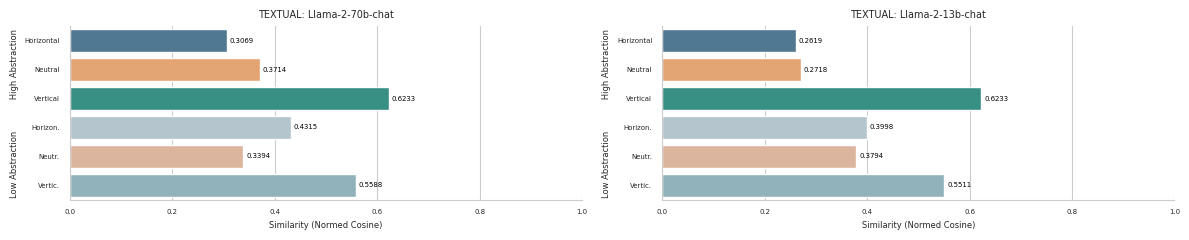

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume similarity_scores_constructs1 and similarity_scores_constructs2 are given
data1 = get_construct_sims(data[0])
data2 = get_construct_sims(data[1])
custom_palette = ['#457b9d', '#f4a261', '#2a9d8f', '#b0c6d1', '#e5b293', '#8ab6c1']

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

# Plot for the first data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data1.values()), y=list(data1.keys()), palette=custom_palette, ax=axs[0])

axs[0].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[0].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[0].set_title('TEXTUAL: '+model_names[0].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data1.values()):
    axs[0].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[0].set_xlim(0, 1)
sns.despine(ax=axs[0])
axs[0].tick_params(axis='both', labelsize=5)

# Plot for the second data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data2.values()), y=list(data2.keys()), palette=custom_palette, ax=axs[1])

axs[1].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[1].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[1].set_title('TEXTUAL: '+model_names[1].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data2.values()):
    axs[1].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[1].set_xlim(0, 1)
sns.despine(ax=axs[1])
axs[1].tick_params(axis='both', labelsize=5)
plt.savefig('results/TEXT_Llama-2_70and13.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [47]:
data = []
for model_name in model_names:
    model_choices = dict()
    with open("results/UNICODE_"+model_name.split("/")[1]+"_selections.txt", "r") as f_in:
        lines = f_in.readlines()

    for idx,line in enumerate(lines):
        if idx == 0:
            continue
        parts = line.split("\t")
        parts[-1].replace("\n","")
        model_choices[parts[0]] = [int(x) for x in parts[1:]]
    
    data.append(model_choices)

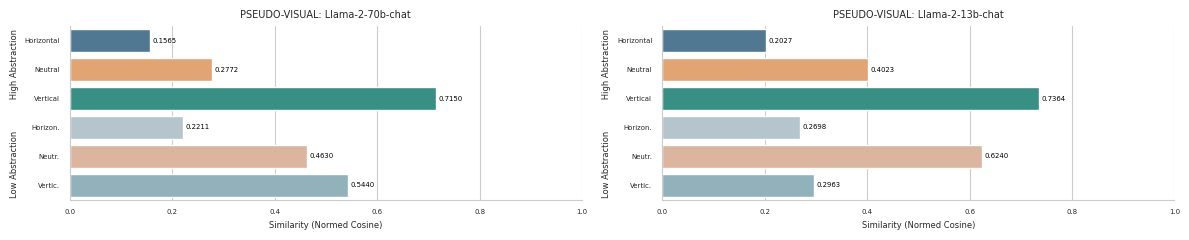

In [48]:
data1 = get_construct_sims(data[0])
data2 = get_construct_sims(data[1])
custom_palette = ['#457b9d', '#f4a261', '#2a9d8f', '#b0c6d1', '#e5b293', '#8ab6c1']

fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

# Plot for the first data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data1.values()), y=list(data1.keys()), palette=custom_palette, ax=axs[0])

axs[0].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[0].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[0].set_title('PSEUDO-VISUAL: '+model_names[0].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data1.values()):
    axs[0].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[0].set_xlim(0, 1)
sns.despine(ax=axs[0])
axs[0].tick_params(axis='both', labelsize=5)

# Plot for the second data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data2.values()), y=list(data2.keys()), palette=custom_palette, ax=axs[1])

axs[1].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[1].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[1].set_title('PSEUDO-VISUAL: '+model_names[1].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data2.values()):
    axs[1].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[1].set_xlim(0, 1)
sns.despine(ax=axs[1])
axs[1].tick_params(axis='both', labelsize=5)
plt.savefig('results/UNICODE_Llama-2_70and13.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


## Average Similarities

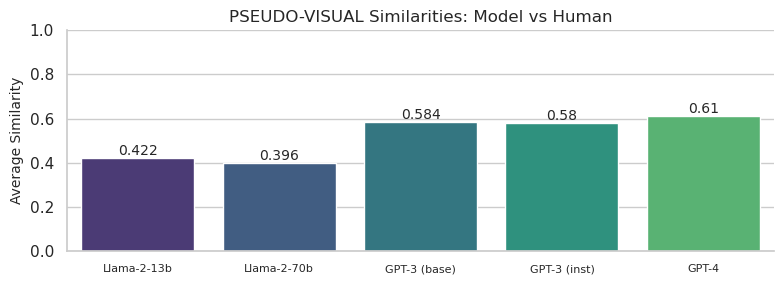

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process the data from the file
file_path = "results/UNICODE_average_similarities.txt"
data = pd.read_csv(file_path, delimiter='\t')

# Filter out specific models
models_to_exclude = ['Llama-2-13b-hf', 'Llama-2-70b-hf']
data = data[~data['Model'].isin(models_to_exclude)]

# Rename models
model_mapping = {
    'Llama-2-13b-chat-hf': 'Llama-2-13b',
    'Llama-2-70b-chat-hf': 'Llama-2-70b',
    'text-davinci-002': 'GPT-3 (base)',
    'text-davinci-003': 'GPT-3 (inst)',
    'gpt-4': 'GPT-4'
}
data['Model'] = data['Model'].map(model_mapping)

# Set Seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("viridis")

# Create bar plot with y-axis scaled to 0-1
plt.figure(figsize=(8, 3))
bars = sns.barplot(x="Model", y="Average Similarity", data=data)

# Set y-axis limits to 0-1
plt.ylim(0, 1)

# Add labels and title
plt.ylabel('Average Similarity', fontsize=10)
plt.xlabel('', fontsize=10)
plt.title('PSEUDO-VISUAL Similarities: Model vs Human', fontsize=12)

# Add data values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=8)

# Remove the top and right spines for aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


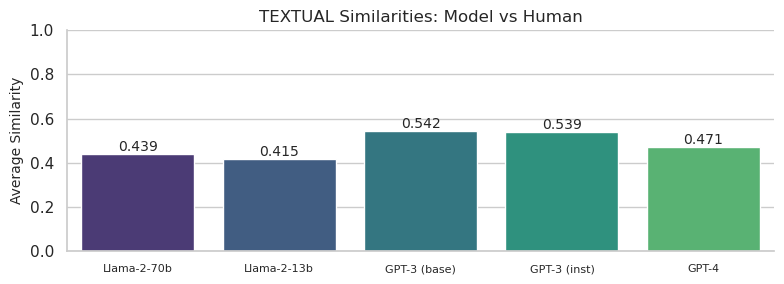

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process the data from the file
file_path = "results/TEXT_average_similarities.txt"
data = pd.read_csv(file_path, delimiter='\t')

# Filter out specific models
models_to_exclude = ['Llama-2-13b-hf', 'Llama-2-70b-hf']
data = data[~data['Model'].isin(models_to_exclude)]

# Rename models
model_mapping = {
    'Llama-2-13b-chat-hf': 'Llama-2-13b',
    'Llama-2-70b-chat-hf': 'Llama-2-70b',
    'text-davinci-002': 'GPT-3 (base)',
    'text-davinci-003': 'GPT-3 (inst)',
    'gpt-4': 'GPT-4'
}
data['Model'] = data['Model'].map(model_mapping)

# Set Seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("viridis")

# Create bar plot with y-axis scaled to 0-1
plt.figure(figsize=(8, 3))
bars = sns.barplot(x="Model", y="Average Similarity", data=data)

# Set y-axis limits to 0-1
plt.ylim(0, 1)

# Add labels and title
plt.ylabel('Average Similarity', fontsize=10)
plt.xlabel('', fontsize=10)
plt.title('TEXTUAL Similarities: Model vs Human', fontsize=12)

# Add data values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=8)

# Remove the top and right spines for aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


# Horizontal / Vertical Analysis of all Models

In [20]:
# load data from all files ending with _responses.txt
# files have format CONDITION_MODEL_responses.txt
# load data into dict with condition as key and dictionary as value with model as key and content of the file as value

import glob 
import json
import os

def load_responses():
    responses = dict()
    for file in glob.glob("results/*_responses.txt"):
        with open(file, "r") as f_in:
            lines = f_in.readlines()
        condition = file.split("_")[0].split("/")[-1]
        model = file.split("_")[1].split(".")[0]
        if condition not in responses.keys():
            responses[condition] = dict()
            responses[condition][model] = lines
        else:
            responses[condition][model] = lines
    return responses

responses = load_responses()
print()
for response in responses:
    print(response, responses[response].keys())

for x in responses['TEXT']['Llama-2-13b-chat-hf']:
    print(x)




UNICODE dict_keys(['Llama-2-13b-chat-hf', 'text-davinci-002', 'text-davinci-003', 'Llama-2-13b-hf', 'gpt-4', 'Llama-2-70b-hf', 'Llama-2-70b-chat-hf'])
TEXT dict_keys(['Llama-2-13b-hf', 'text-davinci-003', 'Llama-2-70b-hf', 'Llama-2-70b-chat-hf', 'Llama-2-13b-chat-hf', 'text-davinci-002', 'gpt-4'])
VISUAL dict_keys(['idefics-80b-instruct', 'idefics-80b'])
fled	up, down, left, right	up'.



Why

fled	up, down, right, left	up'.



The

fled	up, left, down, right	up'.



The

fled	up, left, right, down	up'.



The

fled	up, right, down, left	up'.



The

fled	up, right, left, down	up'.



The

fled	down, up, left, right	up'.



The

fled	down, up, right, left	up'.



The

fled	down, left, up, right	up'.



The

fled	down, left, right, up	up'.



The

fled	down, right, up, left	up'.



The

fled	down, right, left, up	up'.



The

fled	left, up, down, right	up'.



Why

fled	left, up, right, down	up'.



The

fled	left, down, up, right	up'.



Why

fled	left, down, right, up	up'.



The

fl

FileNotFoundError: [Errno 2] No such file or directory: 'results/VISUAL_Llama-2-13b-hf_responses.txt'